<a href="https://colab.research.google.com/github/Mehvishh25/CODSOFT_Data-Science/blob/main/Codsoft_Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/IMDb Movies India.csv',encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(5659, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [ ]:
df['Year'] = df['Year'].apply(lambda x: str(x).strip('()'))
df['Year'].head()

,Year
1,2019
3,2019
5,1997
6,2005
8,2012


In [ ]:
df['Duration']

,Duration
1,109 min
3,110 min
5,147 min
6,142 min
8,82 min
...,...
15493,115 min
15494,153 min
15503,125 min
15505,129 min


In [ ]:
df['Duration']=df['Duration'].apply(lambda x: str(x).split(' ')[0])
df['Duration'].head()

,Duration
1,109
3,110
5,147
6,142
8,82


In [ ]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 486.3+ KB


In [ ]:
df.drop(['Actor 2' , 'Actor 3'], axis=1, inplace=True)

<ipython-input-32-fdfcb9beaa81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')


<Axes: ylabel='Director'>

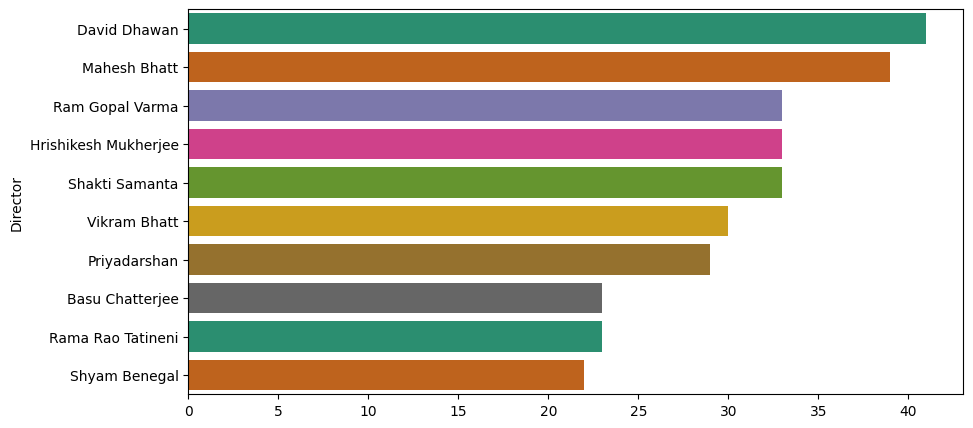

In [ ]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')

<ipython-input-33-de07b8181bb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')


<Axes: ylabel='Genre'>

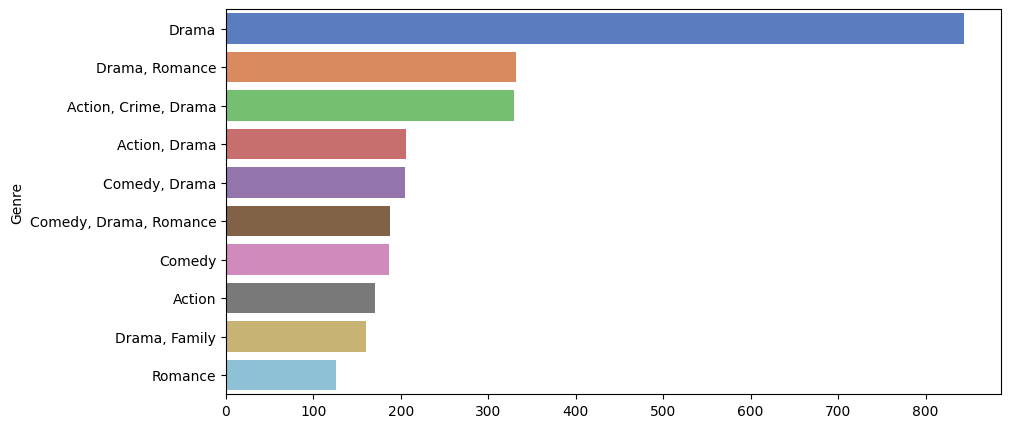

In [ ]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')

In [ ]:
high_rating_movies = df[df['Rating'] > 8.5]
high_rating_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
967,An Insignificant Man,2016,96,"Documentary, Thriller",8.7,1928,Khushboo Ranka,Vinay Shukla
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand
1341,Atal Faisla,2018,127,Drama,8.8,5,Abdul Sattar,Sahil Akhtar
1432,Awasaan,2020,101,Drama,8.7,21,Rajat Kumar Chaturvedi,Arjun Chakrabarty
1469,B for Bundelkhand,2017,117,Drama,8.8,5,Vishal Mourya,Bharat Chawla
1709,Bahattar Hoorain,2019,120,Comedy,8.8,23,Sanjay Puran Singh Chauhan,Narottam Bain
1729,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu
2093,Bhagwan Parshuram,1970,136,Drama,8.7,10,Babubhai Mistry,Niranjan Sharma
2437,Black Rose,2020,120,Thriller,8.6,38,Hemant N Mishra,Samiksha Bhatnagar
2709,Chaar Sahibzaade 2: Rise of Banda Singh Bahadur,2016,134,Animation,8.6,656,Harry Baweja,Harman Baweja


<Axes: >

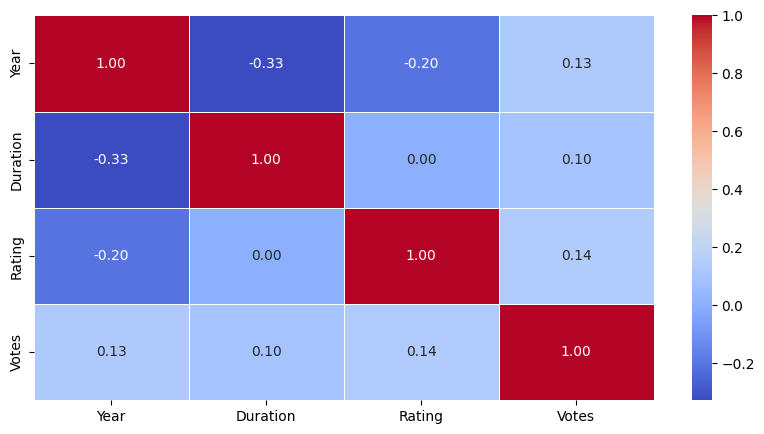

In [ ]:
new_df=  df.drop(columns=['Name','Actor 1','Director','Genre'])
corr=new_df.corr()
plt.figure(figsize=(10,5))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)

In [ ]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating
df['Director_encoded'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor_encoded'] = df.groupby('Actor 1')['Rating'].transform('mean')

In [ ]:
X = df[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']]
Y = df['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
r2_score(y_test,y_pred)

0.7168932058146814

In [ ]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
r2_score(y_test,y_pred)

0.7552001064112797